<a href="https://colab.research.google.com/github/Eduard25/Clasificacion-de-Galaxias-con-Filtros/blob/main/Visualizacion_de_Modelo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Este codigo es para poder predecir a traves del modelo que creamos en el notebook Entrenando el Modelo1, que no tuvo ningun filtro. En los otros dos notebooks, la visualizacion se encuentra en esos mismos notebooks

In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Cargar el modelo entrenado desde el archivo .h5
model = load_model('/content/gdrive/MyDrive/Neuronal Networks Class/ClasificadorGalaxias/Entrenado2.h5')


In [6]:
#Definimos las funciones que nos permitirán analizar las imagenes y visualizarlas

##IMPORTANTE: Al predecir la clasificación de una imagen, de misma forma se debe cambiar la ruta
## Que aparece en esta funcion a dicha imagen
def preprocess_image(img_path, target_size):
    img = image.load_img('/content/gdrive/MyDrive/Neuronal Networks Class/ClasificadorGalaxias/Imagenes/atareto1.jpg', target_size=(69,69))
    img_array = image.img_to_array(img)# Convertimos la imagen a un array de numpy
    img_array = np.expand_dims(img_array, axis=0)# Añadimos una dimension extra, que representa el tamaño del batch
    img_array /= 255.0  # Normalizar los píxeles de la imagen al rango [0, 1]
    return img_array


In [7]:
def classify_image(model, img_array, class_labels):
    predictions = model.predict(img_array)#Guardamos la prediccion del modelo
    predicted_class = np.argmax(predictions, axis=1)# Obtenemos el valor máximo de la prediccion del modelo
    return class_labels[predicted_class[0]], predictions#Obtenemos su clase predicha


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
La imagen se clasifica como: Disk, Edge-on, Rounded Bulge
Predicciones completas: [[0.56456786 0.39518282 0.52201474 0.6741627  0.9126425  0.77351946
  0.90826577 0.21801665 0.32202643 0.82861996]]


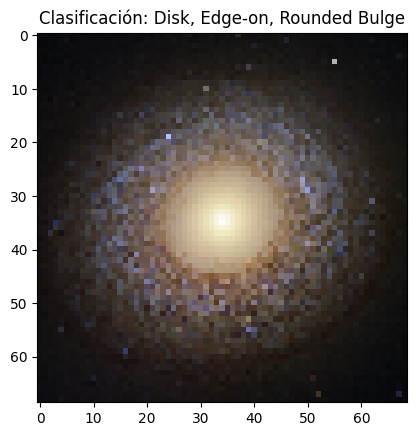

In [8]:
# Definir el tamaño de la imagen y las etiquetas de las clases
target_size = (69, 69)  # Ajusta este tamaño según el tamaño de las imágenes de entrenamiento
class_labels = ['Disk, Face-on, No Spiral', 'Smooth, Completely round', 'Smooth, in-between round',
                'Smooth, Cigar shaped', 'Disk, Edge-on, Rounded Bulge', 'Disk, Edge-on, Boxy Bulge',
                'Disk, Edge-on, No Bulge', 'Disk, Face-on, Tight Spiral', 'Disk, Face-on, Medium Spiral',
                'Disk, Face-on, Loose Spiral']  # Reemplaza con las etiquetas de tus clases

# Ruta de la imagen que deseas clasificar. (Tambien cambiarla y poner la misma en la funcion preprocess_image)
img_path = '/content/gdrive/MyDrive/Neuronal Networks Class/ClasificadorGalaxias/Imagenes/atareto1.jpg'

# Preprocesar la imagen
img_array = preprocess_image(img_path, target_size)

# Realizar la predicción
predicted_class, predictions = classify_image(model, img_array, class_labels)

# Imprimir el resultado
print(f"La imagen se clasifica como: {predicted_class}")
print(f"Predicciones completas: {predictions}")

# Opcional: Mostrar la imagen
img = image.load_img(img_path, target_size=target_size)
plt.imshow(img)
plt.title(f"Clasificación: {predicted_class}")
plt.show()
